Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem:**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [55]:
#importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
!gdown 1Q0JMsqD2beO-Q-Oixr-r5zPYksWD812q

Downloading...
From: https://drive.google.com/uc?id=1Q0JMsqD2beO-Q-Oixr-r5zPYksWD812q
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 25.1MB/s]


In [57]:
df= pd.read_csv('netflix.csv')

In [58]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [59]:
#length of the data
len(df)

8807

In [60]:
#checking datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [61]:
#uniques values in each of the column
for i in df.columns:
  print(i,':',df[i].nunique()) #it shows show_id and title are the unique key from the data

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [62]:
#checking null values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [63]:
#checking occurance of each of the rating
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

from the above code, it's understood that 3 of the duration data misplaced in rating column

In [64]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [65]:
#unnesting director column
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'director'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [66]:
#unnesting cast column
constraint2=df['cast'].apply(lambda x:str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=df_new2.reset_index()
df_new2.rename(columns={0:'cast'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [67]:
#unnesting listed_in column(Genre)
df_new3=df[['title','listed_in']].copy()
df_new3['list_listed_in']=df['listed_in'].apply(lambda x:str(x).split(', '))
df_new3=df_new3.explode('list_listed_in')
df_new3.drop('listed_in',axis=1,inplace=True)
df_new3.rename(columns={'list_listed_in':'Genre'},inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [68]:
#unnesting country column
constraint3=df['country'].apply(lambda x:str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint3,index=df['title'])
df_new4=df_new4.stack()
df_new4=df_new4.reset_index()
df_new4.drop('level_1',axis=1,inplace=True)
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [69]:
#merging all the unnested data
df_new5=df_new1.merge(df_new2,how='inner',on=['title'])
df_new6=df_new3.merge(df_new4,how='inner',on=['title'])

df_new=df_new5.merge(df_new6,on=['title'],how='inner')

In [70]:
df_new.head()

,title,director,cast,Genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


In [71]:
#replacing nan values of director and actor by Unknown Actor and Director
df_new['cast'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['director'].replace(['nan'],['Unknown Director'],inplace=True)
df_new['country'].replace(['nan'],[np.nan],inplace=True)
df_new.head(1)

,title,director,cast,Genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States


In [72]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [73]:
#merging new df to original df

df_final=df_new.merge(df[['show_id','type','title','date_added','release_year','rating','duration']],on=['title'],how='left')
df_final.head(5)

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [74]:
df_final.shape

(201991, 11)

In [75]:
df_final.isnull().sum()

title               0
director            0
cast                0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [76]:
df_final.loc[df_final['duration'].isnull(),'duration']

126537    NaN
131603    NaN
131737    NaN
Name: duration, dtype: object

above shows that 3 of the duration columns written in rating so replacing it

In [77]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final.isnull().sum()

title               0
director            0
cast                0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [78]:
df_final['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1576
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: count, dtype: int64

In [79]:
df_final['rating'].fillna('NR',inplace=True) #replacing null values of rating column as NR(not rated) to match 'NR' given to columns where rating had duration detail
df_final.isnull().sum()

title               0
director            0
cast                0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [80]:
df_final.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [81]:
#df_final['date_added'].value_counts()

In [82]:
df_final.loc[df_final['date_added'].isnull(),'release_year'].unique()#this function helps to identify unique release_year for all the missing date-added column

array([2013, 2018, 2003, 2008, 2010, 2012, 2016, 2015])

Taking first unique value 2013 to find respective mode of date_added

In [83]:
df_final[df_final['release_year']==2013]['date_added'].mode().values[0]

'April 9, 2019'

above shows that most common added date for movies/series release in year 2013 is April 9, 2019 we're using this concept using loop function to assign null values in date_added

In [84]:
#filling missing date_added

for i in df_final.loc[df_final['date_added'].isnull(),'release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)


In [85]:
df_final['date_added'].isnull().sum()#checking whether all the null value replaced

0

In [86]:
df_final['director'].nunique()

4994

In [87]:
#filling missing values in country column

for i in df_final.loc[df_final['country'].isnull(),'director'].unique(): #filters rows with null countries and provides unique directors each director will be assigned to i
  if i in df_final[~df_final['country'].isnull()]['director'].unique():
    imp=df_final[df_final['director']==i]['country'].mode().values[0]
    df_final.loc[df_final['director']==i,'country']=df_final.loc[df_final['director']==i,'country'].fillna(imp)



In [88]:
df_final['country'].isnull().sum() #still there are missing countries hence using cast's country mode to fill na

4276

In [89]:
for i in df_final[df_final['country'].isnull()]['cast'].unique():
  if i in df_final[~df_final['country'].isnull()]['cast'].unique():
    imp=df_final[df_final['cast']==i]['country'].mode().values[0]
    df_final.loc[df_final['cast']==i,'country']=df_final.loc[df_final['cast']==i,'country'].fillna(imp)

In [90]:
#If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

title           0
director        0
cast            0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [91]:
df_final.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [92]:
#removing mins from duration data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [93]:
df_final['movie_duration']=df_final['duration'].copy()
df_final1=df_final.copy()

In [94]:
df_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons


In [95]:
df_final1['movie_duration'].isnull().sum()

0

In [96]:
df_final1.loc[df_final1['movie_duration'].str.contains('Season'),'movie_duration']=0
df_final1['movie_duration']=df_final1['movie_duration'].astype('int')

In [97]:
df_final1['date_added']=pd.to_datetime(df_final1['date_added'],format='mixed')
df_final1['year_added']=df_final1['date_added'].dt.year
df_final1['month_added']=df_final1['date_added'].dt.month

In [98]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['0','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['movie_duration'] = pd.cut(df_final1['movie_duration'],bins=bins1,labels=labels1)
df_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100,2021,9
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9


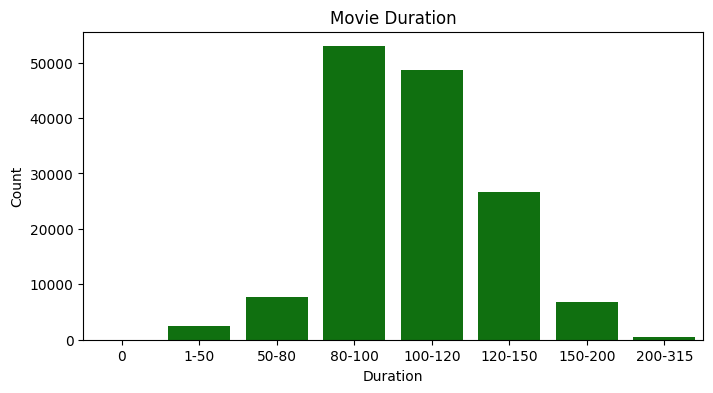

In [99]:
plt.figure(figsize=(8,4))
y=df_final1[~df_final1['duration'].str.contains('Season')]['movie_duration'].value_counts() #helps to filter only movies
x=df_final1[~df_final1['duration'].str.contains('Season')]['movie_duration'].value_counts().index
sns.barplot(x=x,y=y,color='green')
plt.title('Movie Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()


above graph shows most of the movies lies in the range between 80-100mins & 100-120mins

In [100]:
df_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100,2021,9
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9


In [101]:
start_year=1991
end_year=2021
df_final1[df_final1['release_year'].between(start_year,end_year)]


,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100,2021,9
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111,100-120,2019,3
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111,100-120,2019,3
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111,100-120,2019,3
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111,100-120,2019,3


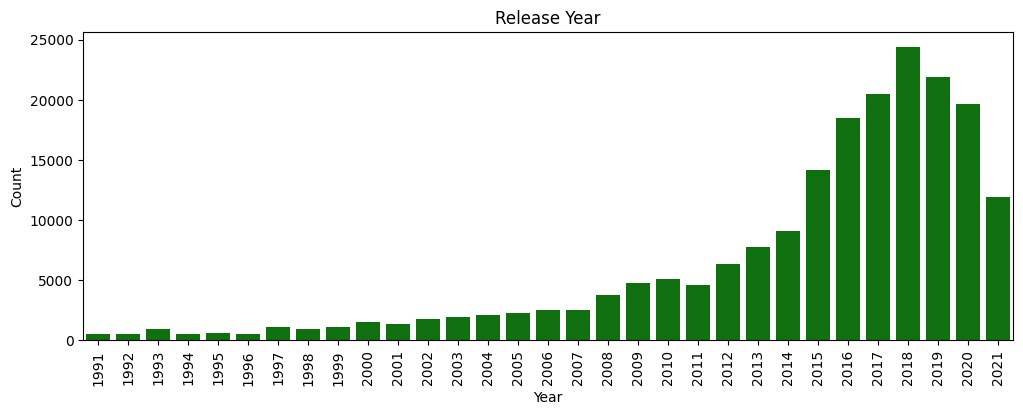

In [102]:
x=df_final1[df_final1['release_year'].between(start_year,end_year)]['release_year'].value_counts().index
y=df_final1[df_final1['release_year'].between(start_year,end_year)]['release_year'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=x,y=y,color='green')
plt.title('Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [103]:
df_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100,2021,9
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9


with below chart we're checking which Genre is most popular

Text(0.5, 1.0, 'Genre')

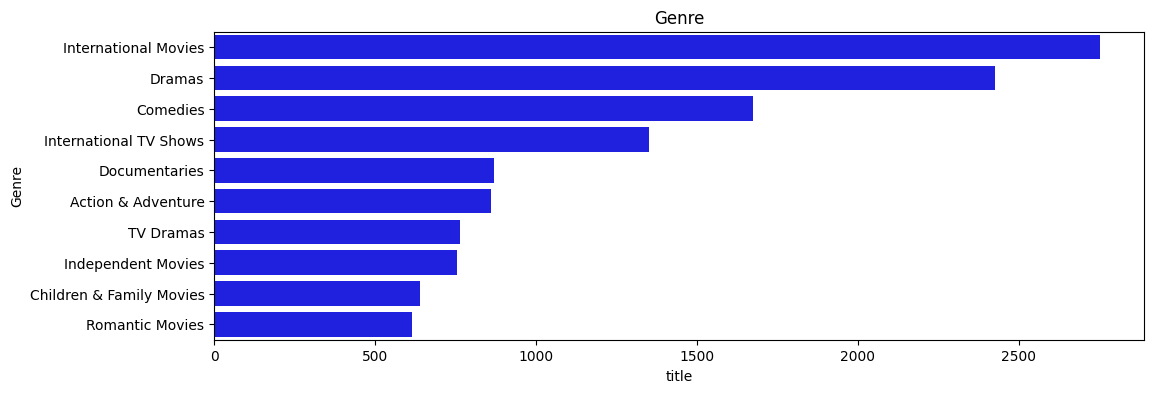

In [104]:
#number of distinct titles on the basis on genre
y=df_final1.groupby('Genre')['title'].nunique().sort_values(ascending=False).head(10).index
x=df_final1.groupby('Genre')['title'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,4))
sns.barplot(x=x,y=y,color='blue',orient='h')
plt.title('Genre')

International movies, Dramas,comedies seems to be more catchy with audience

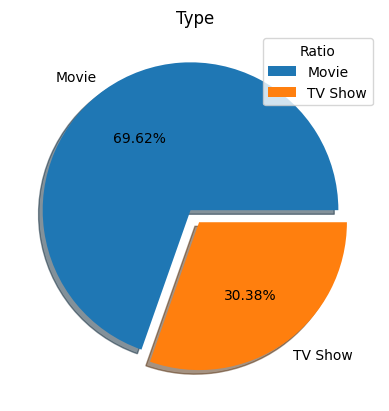

In [105]:
#no. of . distinct values on the basis on type
x=df_final1.groupby(['type']).agg({'title':'nunique'})
plt.pie(x['title'],labels=x.index,autopct='%1.2f%%',explode=[0.05,0.05],shadow=True)
plt.title('Type')
plt.legend(title='Ratio')
plt.show()

Above chart shows that netflix has more movies in its platform than TV shows

In [106]:
df_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100,2021,9
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9


In [109]:
df_release_year=df_final1.query("date_added>1990").groupby('release_year').agg({'title':'nunique'}).sort_values(by='release_year',ascending=False)

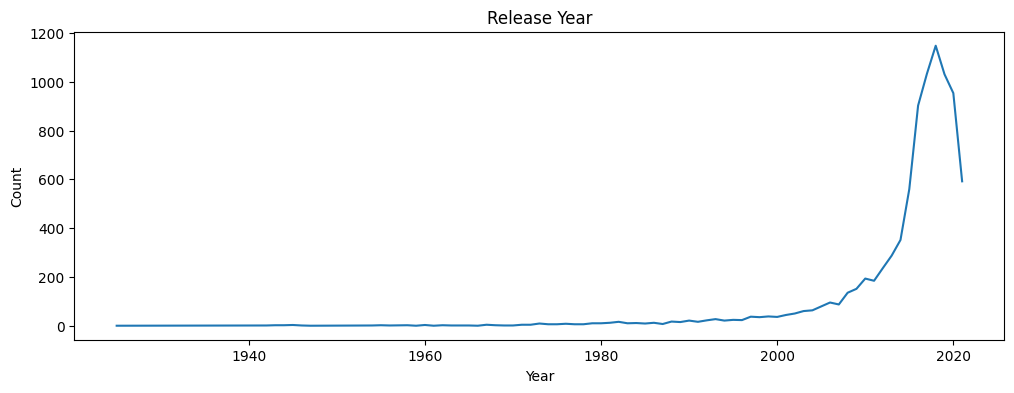

In [110]:
df_release_year['title'].plot(kind='line',figsize=(12,4))
plt.title('Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

above graph shows that no.of movies released per year increases over the year and taken a slight dig post 2019 due to covid

> Add blockquote



In [111]:
#distinct movies/shows on the basis on country

pd.set_option('display.max_rows', None)
df_final1.groupby('country').agg({'title':'nunique'}).sort_values(by='country', ascending=False)

,title
country,
Zimbabwe,3
West Germany,5
Vietnam,7
Venezuela,4
Vatican City,1
Uruguay,14
Unknown Country,175
"United States,",1
United States,4248


In [112]:
#there are duplicate columns for country hence replacing them
df_final['country']=df_final['country'].str.replace(',','')
#df_final['country'].value_counts() #after checking confirmed that duplicate values for country removed

In [113]:

y=df_final1.groupby('country').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(5)
x=df_final1.groupby('country').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(5)['country']

In [114]:
x

119     United States
47              India
117    United Kingdom
22             Canada
38             France
Name: country, dtype: object

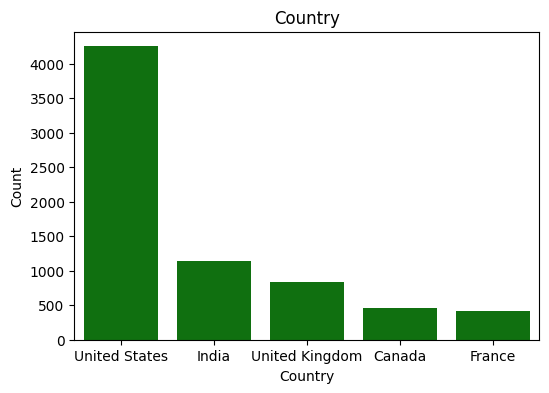

In [115]:
plt.figure(figsize=(6,4))
sns.barplot(x=x,y=y['title'],color='green')
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

US,India,UK are the top 3 content creating countries for Netflix

In [116]:
df_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100,2021,9
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9


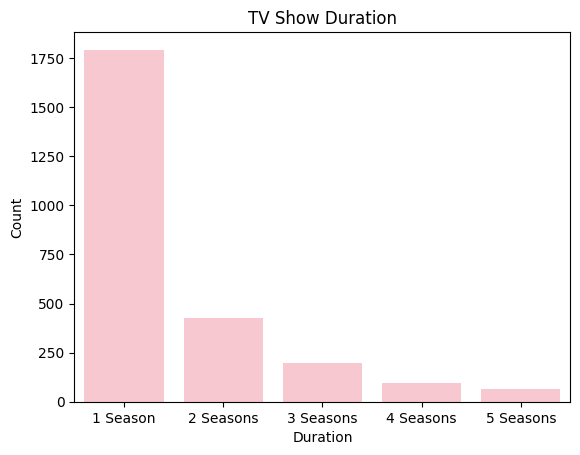

In [117]:
x=df_final1[df_final1['duration'].str.contains('Season')].groupby('duration').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(5).reset_index()['duration']
y=df_final1[df_final1['duration'].str.contains('Season')].groupby('duration').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(5).reset_index()['title']
sns.barplot(x=x,y=y,color='pink')
plt.title('TV Show Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

TV shows with 1 Season seems to be more engaging to audience

In [118]:
df_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration,year_added,month_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100,2021,9
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0,2021,9


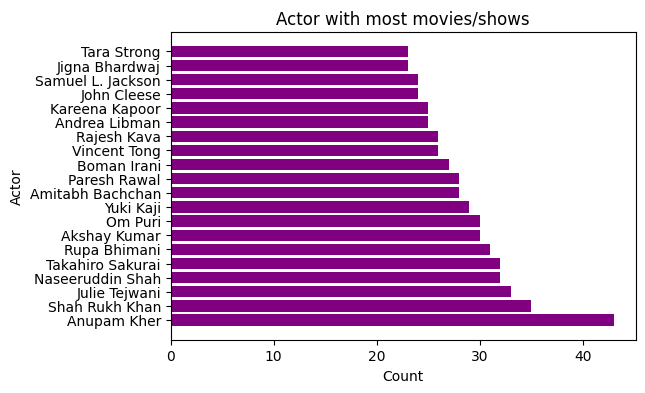

In [119]:
df_actor=df_final1[df_final1['cast']!='Unknown Actor'].groupby('cast').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(20).reset_index()
plt.figure(figsize=(6,4))
plt.barh(y=df_actor['cast'],width=df_actor['title'],color='purple')
plt.title('Actor with most movies/shows')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()


Anupam Kher,SRK,Julie Tejwani has most content in the platform

In [120]:
df_final1[(df_final1['director']!='Unknown Director') & (df_final1['type']=='Movie')].groupby('director').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(10).reset_index()

,director,title
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,15
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Martin Scorsese,12
9,Youssef Chahine,12


Direcotr Rajiv Chilaka, Jan Suter, Raul Campos has most movies in Netflix

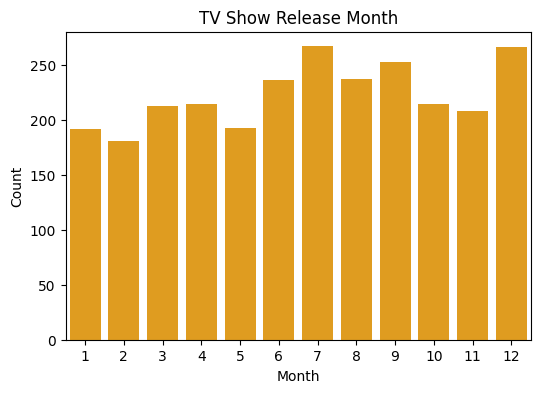

In [121]:
#find the best time to release a TV show
x=df_final1[df_final1['type']=='TV Show'].groupby('month_added').agg({'title':'nunique'}).sort_values(by='title',ascending=False).reset_index()['month_added']
y=df_final1[df_final1['type']=='TV Show'].groupby('month_added').agg({'title':'nunique'}).sort_values(by='title',ascending=False).reset_index()['title']
plt.figure(figsize=(6,4))
sns.barplot(x=x,y=y,color='orange')
plt.title('TV Show Release Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

It is suggested that July and December are the best month's to release a TV show in netflix

<Figure size 600x400 with 0 Axes>

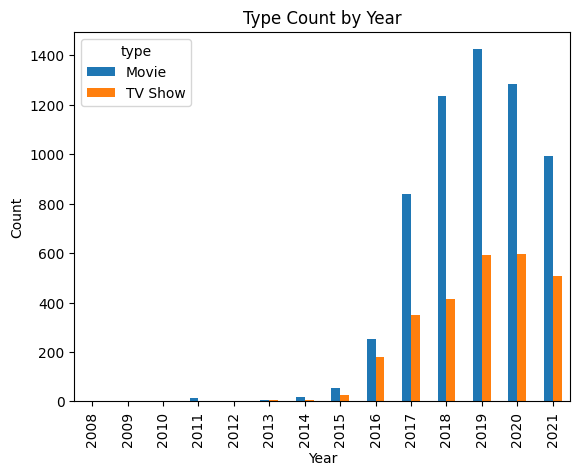

In [122]:
#df_last_10_years=df_final1[df_final1['year_added']>=2010]
#.groupby('year_added').agg({'title':'nunique'}).sort_values(by='title',ascending=False).reset_index()
type_counts = df_final1.groupby(['year_added','type'])['title'].nunique().unstack()
type_counts
plt.figure(figsize=(6,4))
type_counts.plot(kind='bar')
plt.title('Type Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


above chart shows that overall movies release per year seems to be more than tv shows

In [123]:
#let's further dig data countrywise to provide country specific recommendations

In [124]:
df_final.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons


In [125]:
df_final.groupby('country')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(5)

,country,title
116,United States,4249
46,India,1138
115,United Kingdom,831
21,Canada,460
37,France,409


our top 5 countries that produces most content are US,India,UK,Canada and France so lets explore our data for these countries and come up with a recommendation

In [126]:
df_final2=df_final1.loc[(df_final1['cast']!='Unknown Actor')& (df_final1['director']!='Unknown Director')]

In [127]:
#creating df for top 5 countries seperately
df_us=df_final2[(df_final2['country']=='United States')]
df_india=df_final2[(df_final2['country']=='India')]
df_uk=df_final2[(df_final2['country']=='United Kingdom')]
df_canada=df_final2[(df_final2['country']=='Canada')]
df_france=df_final2[(df_final2['country']=='France')]
df_india.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,movie_duration,year_added,month_added
621,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,Comedies,India,s23,Movie,2021-09-21,1996,TV-PG,161,150-200,2021,9
622,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,International Movies,India,s23,Movie,2021-09-21,1996,TV-PG,161,150-200,2021,9
629,Avvai Shanmughi,K.S. Ravikumar,Nassar,Comedies,India,s23,Movie,2021-09-21,1996,TV-PG,161,150-200,2021,9
630,Avvai Shanmughi,K.S. Ravikumar,Nassar,International Movies,India,s23,Movie,2021-09-21,1996,TV-PG,161,150-200,2021,9
631,Avvai Shanmughi,K.S. Ravikumar,S.P. Balasubrahmanyam,Comedies,India,s23,Movie,2021-09-21,1996,TV-PG,161,150-200,2021,9


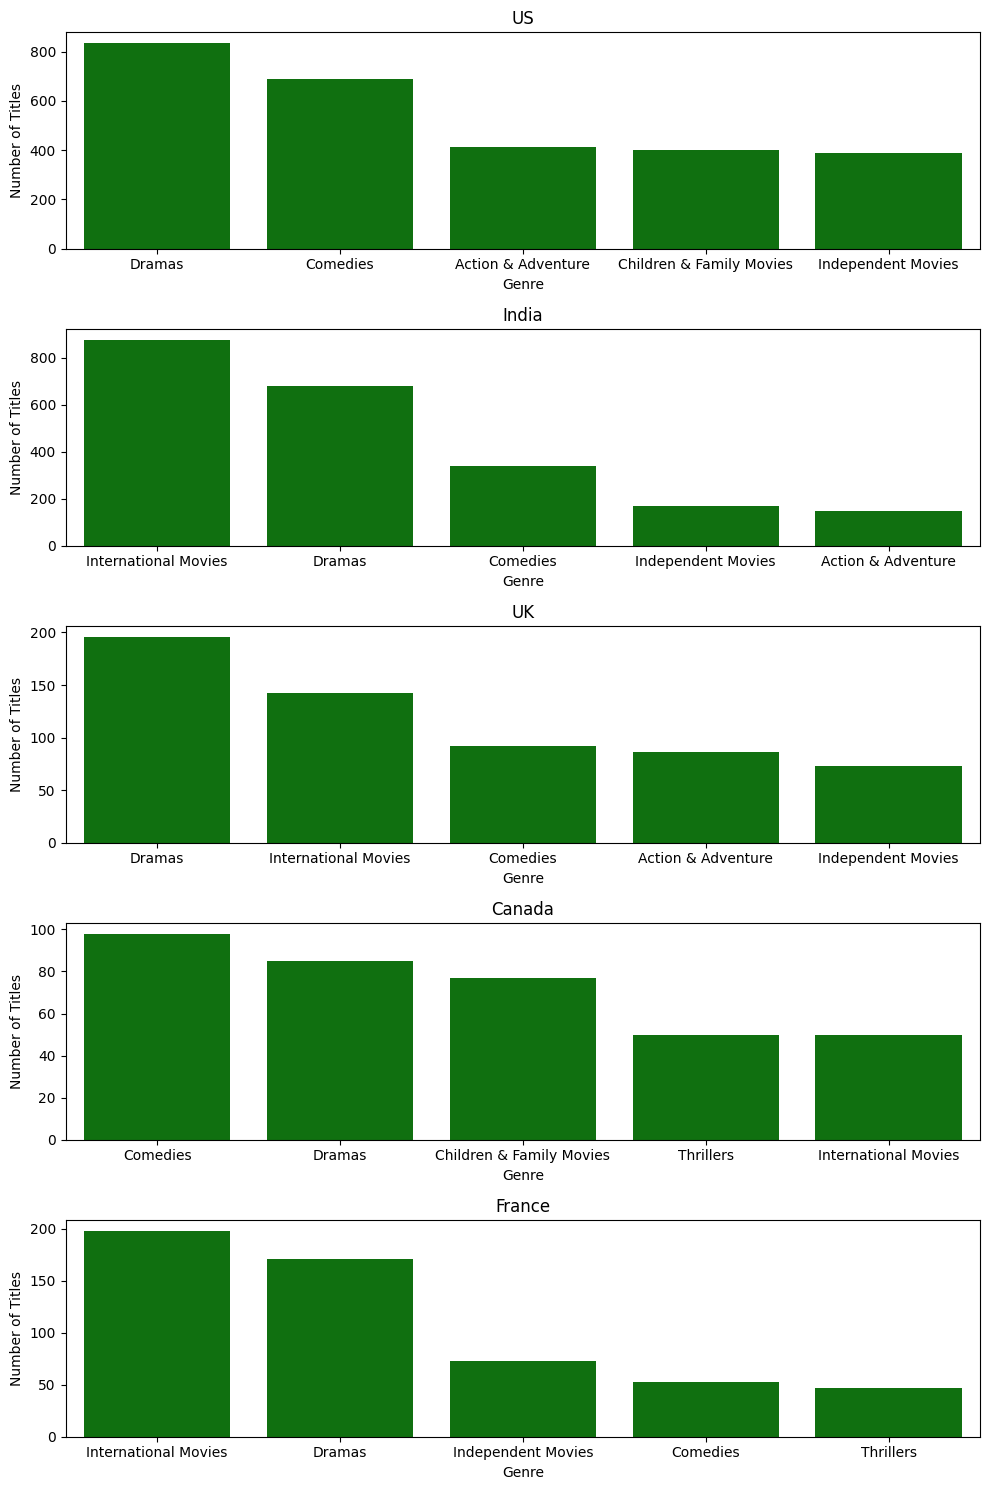

In [128]:
# Prepare the data for plotting
dfs = [df_us, df_india, df_uk, df_canada, df_france]
titles = ['US', 'India', 'UK', 'Canada', 'France']

# Create subplots
plt.figure(figsize=(10, 15))  # Adjust figure size as needed

for i, df in enumerate(dfs):
    plt.subplot(5, 1, i+1)
    x = df.groupby('Genre')['title'].nunique().reset_index().sort_values(by='title', ascending=False).head(5)['Genre']
    y = df.groupby('Genre')['title'].nunique().reset_index().sort_values(by='title', ascending=False).head(5)['title']
    sns.barplot(x=x, y=y, color='green')
    plt.title(titles[i])
    plt.xlabel('Genre')  # Add x-axis label
    plt.ylabel('Number of Titles')  # Add y-axis label

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

It is recommended for netflix to produce International Movies,Dramas,Comedies since these are the Genre's occupies top 2 spot in top 5 countries with higher viewership and in UK, british TV shows can be release apart from the topics mentioned above

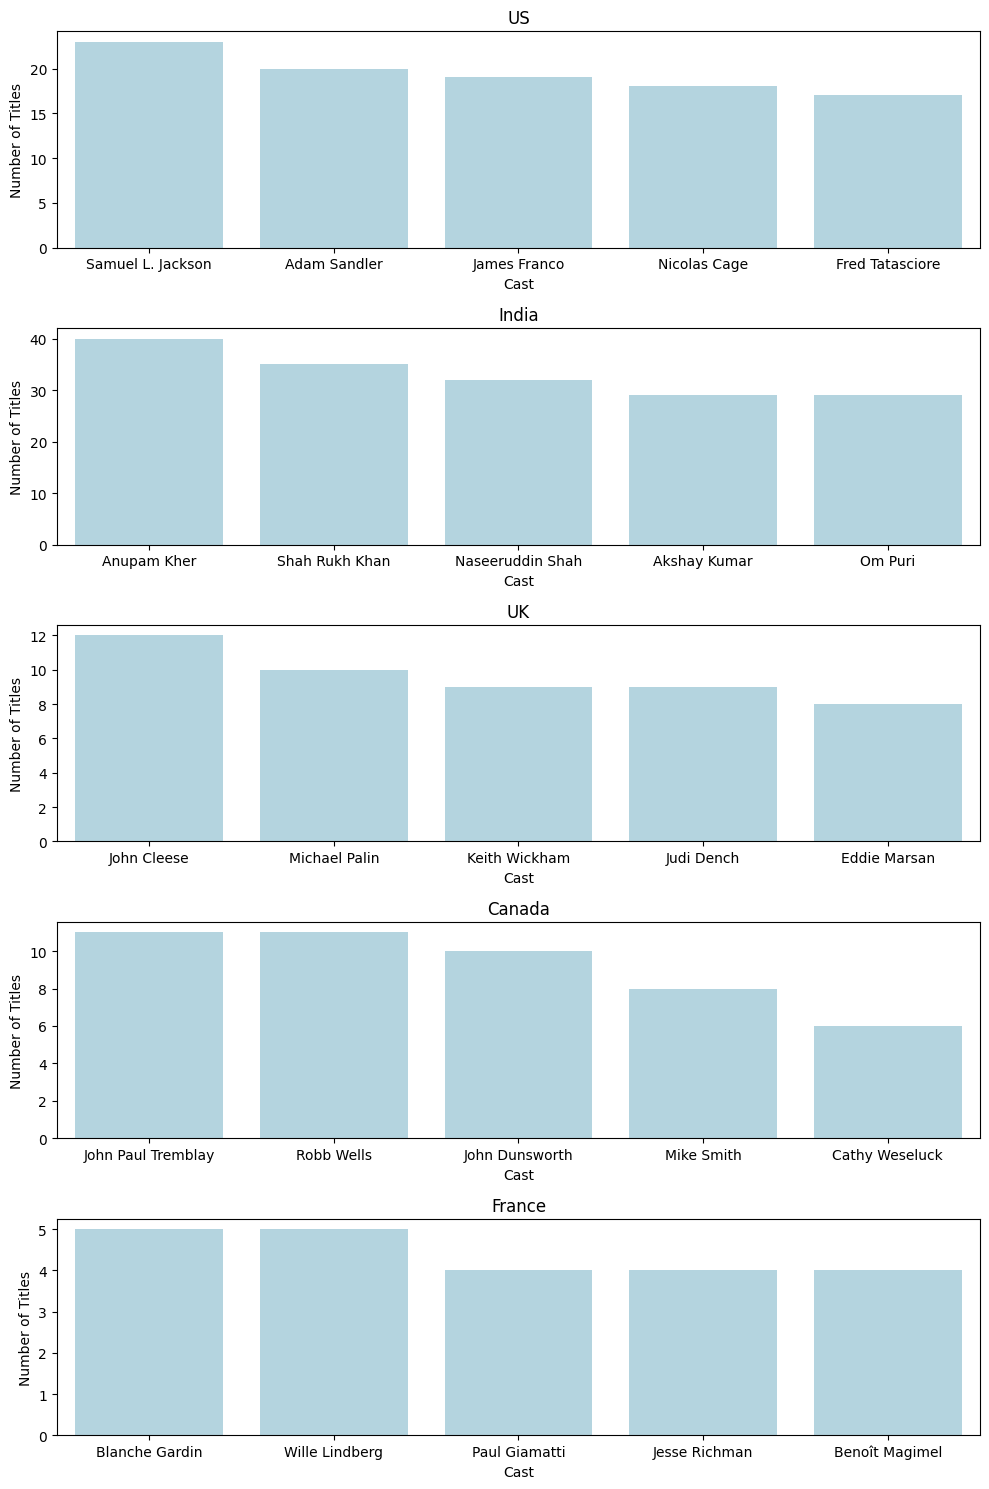

In [129]:
plt.figure(figsize=(10, 15))  # Adjust figure size as needed

for i, df in enumerate(dfs):
    plt.subplot(5, 1, i+1)
    x = df.groupby('cast')['title'].nunique().reset_index().sort_values(by='title', ascending=False).head(5)['cast']
    y = df.groupby('cast')['title'].nunique().reset_index().sort_values(by='title', ascending=False).head(5)['title']
    sns.barplot(x=x, y=y, color='lightblue')
    plt.title(titles[i])
    plt.xlabel('Cast')  # Add x-axis label
    plt.ylabel('Number of Titles')  # Add y-axis label

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

above are the top 5 famous actors in top contributing countries

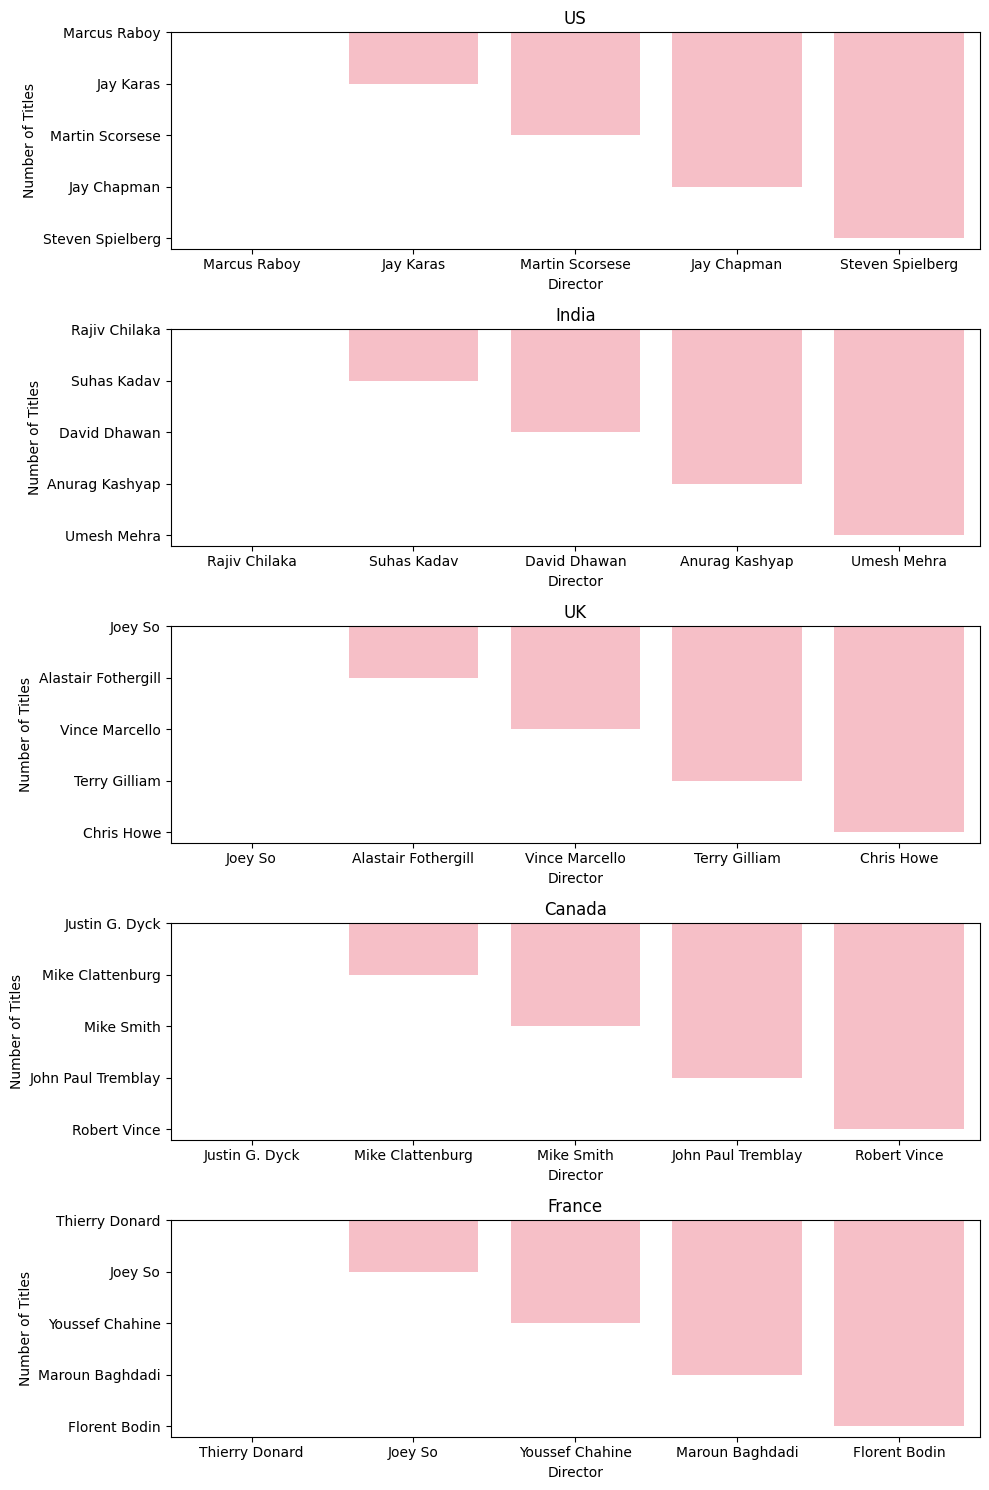

In [130]:
plt.figure(figsize=(10, 15))  # Adjust figure size as needed

for i, df in enumerate(dfs):
    plt.subplot(5, 1, i+1)
    x = df.groupby('director')['title'].nunique().reset_index().sort_values(by='title', ascending=False).head(5)['director']
    y = df.groupby('director')['title'].nunique().reset_index().sort_values(by='title', ascending=False).head(5)['director']
    sns.barplot(x=x, y=y, color='lightpink')
    plt.title(titles[i])
    plt.xlabel('Director')  # Add x-axis label
    plt.ylabel('Number of Titles')  # Add y-axis label

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

above are the top 5 famous directors in top contributing countries

**Recommendations:**

1.overall movies released per year are more than tv shows

2.It is recommended that July and December are the best month's to release a TV show in Netflix

3.Direcotr Rajiv Chilaka, Jan Suter, Raul Campos has most audience in Netflix
4.Anupam Kher, SRK, Julie Tejwani are most famous casts for Netflix so they can acquire rights/produce these actors contents to grab audience

5.TV shows with 1 Season seems to be more catchy among audience and movies with duration(80-100)mins attracts more audience

6.Netflix has almost 70% more movies compared to TV shows, although TV shows is on the rise among audience in recent years, movies are still the best content to attract audience

7.It is recommended for netflix to produce International Movies,Dramas,Comedies since these are the Genre's occupies top 2 spot in top 5 countries with higher viewership and in UK, british TV shows can be released apart from the topics mentioned above